In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
data = pd.read_csv("/Users/aryanmanchanda/Projects/aura-check/Data/DASS Responses/data.csv", delimiter="\t")
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [147]:
questions = []
for i in data.columns:
    if i.startswith("Q") and i.endswith("A"):
        questions.append(i)

In [148]:
questions

['Q1A',
 'Q2A',
 'Q3A',
 'Q4A',
 'Q5A',
 'Q6A',
 'Q7A',
 'Q8A',
 'Q9A',
 'Q10A',
 'Q11A',
 'Q12A',
 'Q13A',
 'Q14A',
 'Q15A',
 'Q16A',
 'Q17A',
 'Q18A',
 'Q19A',
 'Q20A',
 'Q21A',
 'Q22A',
 'Q23A',
 'Q24A',
 'Q25A',
 'Q26A',
 'Q27A',
 'Q28A',
 'Q29A',
 'Q30A',
 'Q31A',
 'Q32A',
 'Q33A',
 'Q34A',
 'Q35A',
 'Q36A',
 'Q37A',
 'Q38A',
 'Q39A',
 'Q40A',
 'Q41A',
 'Q42A']

In [149]:
depression_questions = ["Q3A", "Q5A", "Q10A", "Q13A", "Q16A", "Q17A", "Q21A", "Q24A", "Q26A", "Q31A", "Q34A","Q37A", "Q38A", "Q42A"]
anxiety_questions = ["Q2A", "Q4A", "Q7A", "Q9A", "Q15A", "Q19A", "Q20A", "Q23A", "Q25A", "Q28A", "Q30A", "Q36A", "Q40A", "Q41A"]
stress_questions = ["Q1A", "Q6A", "Q8A", "Q11A", "Q12A", "Q14A", "Q18A", "Q22A", "Q27A", "Q29A", "Q32A", "Q33A", "Q35A", "Q39A"]

words = ["VCL1", "VCL2", "VCL3", "VCL4","VCL5", "VCL7", "VCL8", "VCL10", "VCL11", "VCL13", "VCL14", "VCL15", "VCL16"]

In [150]:
data["depression_score"] = data[depression_questions].sum(axis =1)
data["anxiety_score"] = data[anxiety_questions].sum(axis=1)
data["stress_score"] = data[stress_questions].sum(axis=1)

data["extraversion"] = data["TIPI1"] - data["TIPI6"]
data["agreeableness"] = data["TIPI7"] - data["TIPI2"]
data["conscientiousness"] = data["TIPI3"] - data["TIPI8"]
data["emotional_stability"] = data["TIPI9"] - data["TIPI4"]
data["openness"] = data["TIPI5"] - data["TIPI10"]

In [151]:
data.head(10)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,familysize,major,depression_score,anxiety_score,stress_score,extraversion,agreeableness,conscientiousness,emotional_stability,openness
0,4,28,3890,4,25,2122,2,16,1944,4,...,2,NaN,41,48,54,-6,2,2,-6,6
1,4,2,8118,1,36,2890,2,35,4777,3,...,4,NaN,38,31,41,2,2,-3,-6,0
2,3,7,5784,1,33,4373,4,41,3242,1,...,3,NaN,53,26,31,-4,0,-3,1,3
3,2,23,5081,3,11,6837,2,37,5521,1,...,5,biology,30,31,30,-3,5,6,2,5
4,2,36,3215,2,13,7731,3,5,4156,4,...,4,Psychology,46,54,43,-3,0,-3,-3,2
5,1,18,6116,1,28,3193,2,2,12542,1,...,4,NaN,27,20,26,-5,6,4,5,0
6,1,20,4325,1,34,4009,2,38,3604,3,...,4,Mechatronics engeenerieng,45,33,28,0,1,3,0,-2
7,1,34,4796,1,9,2618,1,39,5823,1,...,2,Music,18,18,20,5,0,1,0,1
8,4,4,3470,4,14,2139,3,1,11043,4,...,4,Psychology,49,53,47,-6,2,-2,-6,1
9,3,38,5187,2,28,2600,4,9,2015,1,...,3,computer programming,56,42,48,-6,-6,3,-6,-2


In [152]:
def score(colname: str, data: pd.DataFrame) -> pd.DataFrame:
    for index, i in enumerate(data[colname]):
        if i <= 9:
            data.loc[index, colname] = 1
        elif 9 < i <= 13:
            data.loc[index, colname] = 2
        elif 13 < i <= 20:
            data.loc[index, colname] = 3
        elif 20 < i <= 27:
            data.loc[index, colname] = 4
        else:
            data.loc[index, colname] = 5
    return data[colname]

In [153]:
score("depression_score", data)
score("anxiety_score", data)
score("stress_score", data)

0        5
1        5
2        5
3        5
4        5
        ..
39770    5
39771    5
39772    3
39773    5
39774    5
Name: stress_score, Length: 39775, dtype: int64

In [154]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,familysize,major,depression_score,anxiety_score,stress_score,extraversion,agreeableness,conscientiousness,emotional_stability,openness
0,4,28,3890,4,25,2122,2,16,1944,4,...,2,NaN,5,5,5,-6,2,2,-6,6
1,4,2,8118,1,36,2890,2,35,4777,3,...,4,NaN,5,5,5,2,2,-3,-6,0
2,3,7,5784,1,33,4373,4,41,3242,1,...,3,NaN,5,4,5,-4,0,-3,1,3
3,2,23,5081,3,11,6837,2,37,5521,1,...,5,biology,5,5,5,-3,5,6,2,5
4,2,36,3215,2,13,7731,3,5,4156,4,...,4,Psychology,5,5,5,-3,0,-3,-3,2


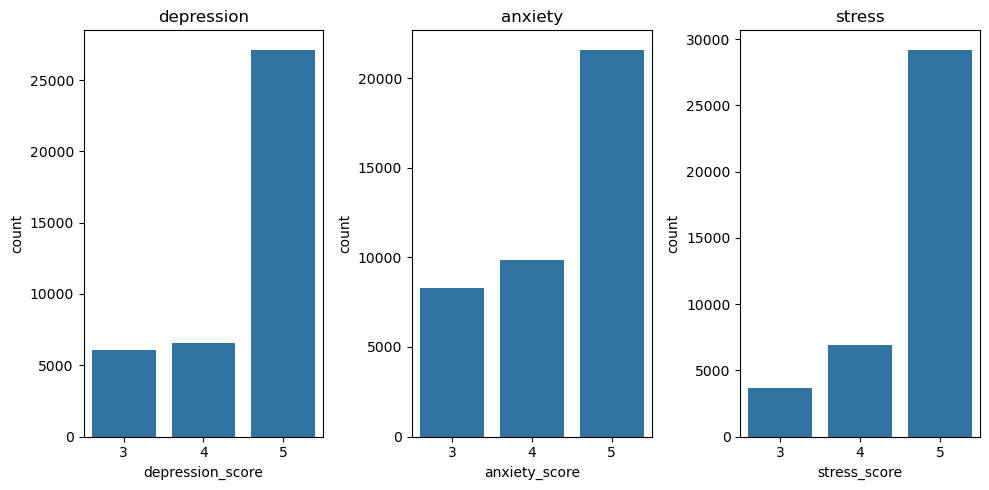

In [155]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes = axes.ravel()
sns.countplot(x = data["depression_score"],ax = axes[0])
axes[0].set_title("depression")
sns.countplot(x = data["anxiety_score"],ax = axes[1])
axes[1].set_title("anxiety")
sns.countplot(x = data["stress_score"],ax = axes[2])
axes[2].set_title("stress")
plt.tight_layout()

([<matplotlib.axis.XTick at 0x314d2d210>,
 [Text(0, 0, 'LessthanHigh'),
  Text(1, 0, 'HighSchool'),
  Text(2, 0, 'University'),
  Text(3, 0, 'Graduate')])

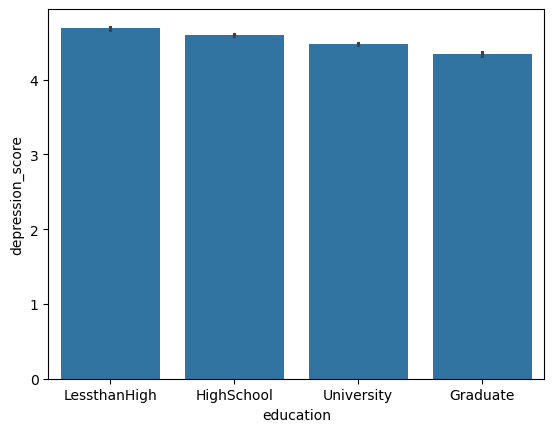

In [156]:
sns.barplot(x="education", y="depression_score", data=data[data["education"] != 0])
plt.xticks(ticks = range(len(data[data["education"] != 0]["education"].unique())), labels = ["LessthanHigh", "HighSchool", "University", "Graduate"])

([<matplotlib.axis.XTick at 0x176e9d290>,
 [Text(0, 0, 'Single'), Text(1, 0, 'Married'), Text(2, 0, 'Divorced')])

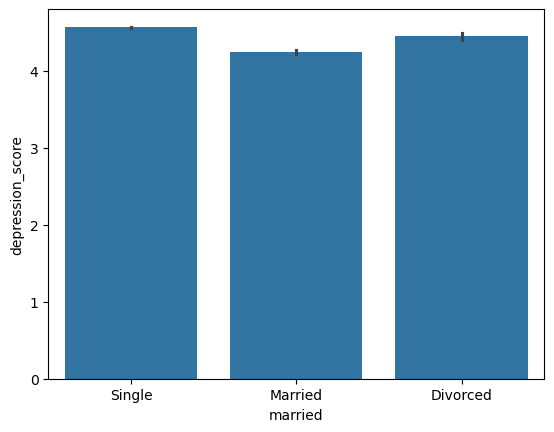

In [157]:
sns.barplot(x="married", y="depression_score", data=data[data["married"] != 0])
plt.xticks(ticks = range(len(data[data["married"] != 0]["married"].unique())), labels = ["Single", "Married", "Divorced"])

<Axes: xlabel='religion', ylabel='depression_score'>

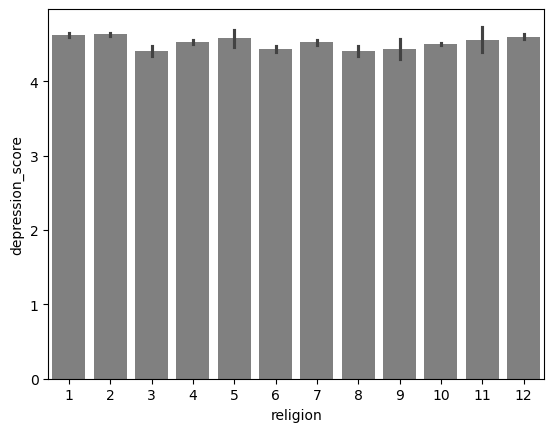

In [158]:
sns.barplot(data = data[data["religion"] != 0], x = "religion", y = "depression_score", color = "grey")

([<matplotlib.axis.XTick at 0x16370a3d0>,
 [Text(0, 0, 'Hetero'),
  Text(1, 0, 'Bi'),
  Text(2, 0, 'Homo'),
  Text(3, 0, 'A'),
  Text(4, 0, 'Other')])

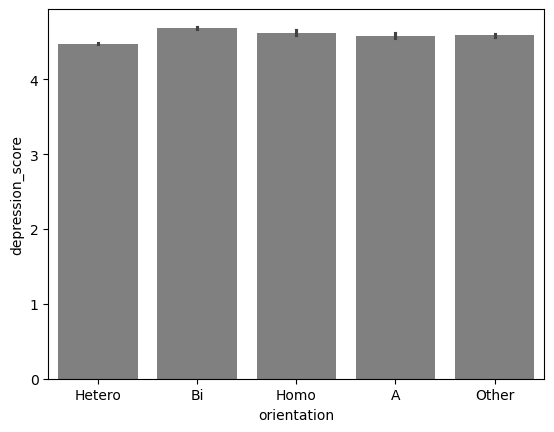

In [159]:
sns.barplot(data = data[data["orientation"] != 0], x = "orientation", y= "depression_score", color = "grey")
plt.xticks(ticks = range(len(data[data["orientation"] != 0]["orientation"].unique())), labels = ["Hetero", "Bi", "Homo", "A", "Other"])

In [160]:
categories = []
for label, item in data.items():
    if pd.api.types.is_object_dtype(item):
        categories.append(label)

In [161]:
categories

['country', 'major']

In [162]:
numericals = []
for label, item in data.items():
    if pd.api.types.is_int64_dtype(item):
        numericals.append(label)

/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_9570/3480842869.py:3: DeprecationWarning: is_int64_dtype is deprecated and will be removed in a future version. Use dtype == np.int64 instead.
  if pd.api.types.is_int64_dtype(item):


In [163]:
len(numericals)

178

In [164]:
dropped_questions = []
for i in data.columns:
    if i.startswith("Q") and (i.endswith("I") or i.endswith("E")):
        dropped_questions.append(i)

data = data.drop(dropped_questions, axis=1)

In [165]:
data_copy = data.copy()

In [166]:
data_copy.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country', 'source',
       'introelapse', 'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1',
       'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'screensize',
       'uniquenetworklocation', 'hand', 'religion', 'orientation', 'race',
       'voted', 'married', 'familysize', 'major', 'depression_score',
       'anxiety_score', 'stress_score', 'extraversion', 'agreeableness',
       'conscientiousness', 'e

In [167]:
data_copy = pd.get_dummies(data_copy, columns=categories)

In [168]:
scores = ["depression_score", "anxiety_score", "stress_score"]

In [169]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_copy, test_size=0.2)

In [170]:
train_data_scores = train_data[scores]

In [171]:
train_data_scores

,depression_score,anxiety_score,stress_score
34770,4,3,3
14394,3,3,3
31398,5,5,5
7042,5,4,5
5655,5,5,5
...,...,...,...
36843,3,3,3
2945,5,5,5
37937,5,5,5
2871,3,4,4


In [172]:
X = train_data.drop(scores, axis=1)

In [173]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31820 entries, 34770 to 25299
Columns: 5544 entries, Q1A to major_zoology
dtypes: bool(5453), int64(91)
memory usage: 187.8 MB


In [174]:
depression_y = train_data_scores["depression_score"]
anxiety_y = train_data_scores["anxiety_score"]
stress_y = train_data_scores["stress_score"]

## For Predicting Depression

In [175]:
X
depression_y

34770    4
14394    3
31398    5
7042     5
5655     5
        ..
36843    3
2945     5
37937    5
2871     3
25299    5
Name: depression_score, Length: 31820, dtype: int64

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, depression_y_train, depression_y_test = train_test_split(X, depression_y, test_size=0.2, random_state=42)

In [177]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

clf.fit(X_train, depression_y_train)
clf.score(X_test, depression_y_test)

0.8719358893777498

In [180]:
depression_preds = clf.predict(X_test)
depression_preds[:10]

array([3, 3, 5, 3, 3, 5, 5, 5, 3, 5])

In [181]:
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(depression_preds, depression_y_test)

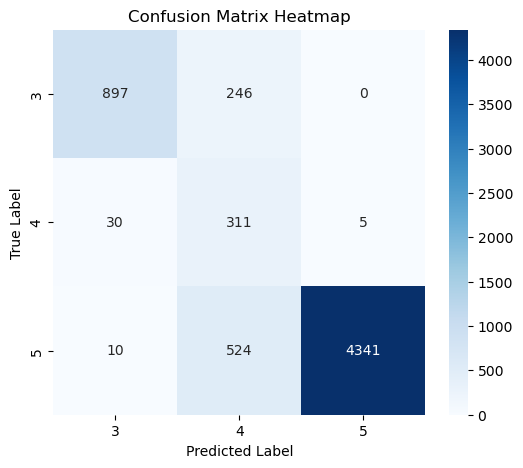

In [184]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [187]:
print(classification_report(depression_preds, depression_y_test))

              precision    recall  f1-score   support

           3       0.96      0.78      0.86      1143
           4       0.29      0.90      0.44       346
           5       1.00      0.89      0.94      4875

    accuracy                           0.87      6364
   macro avg       0.75      0.86      0.75      6364
weighted avg       0.95      0.87      0.90      6364



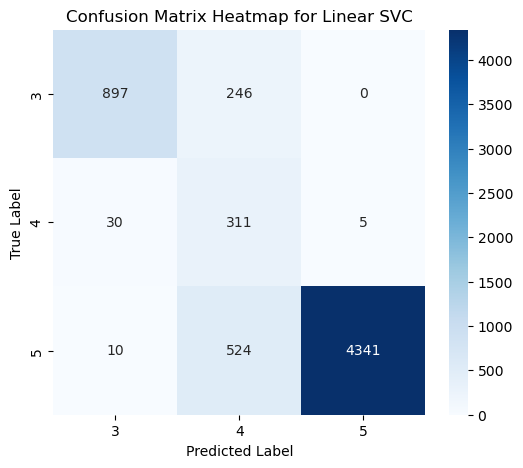

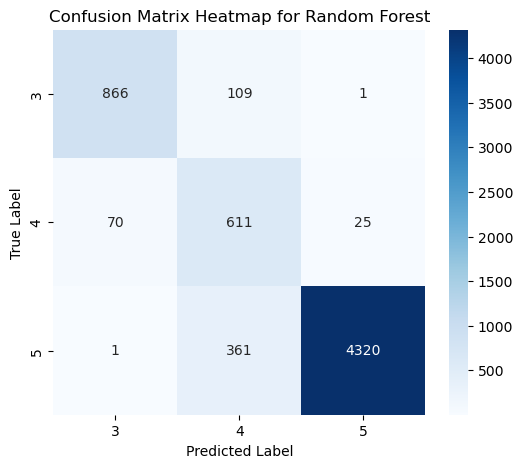

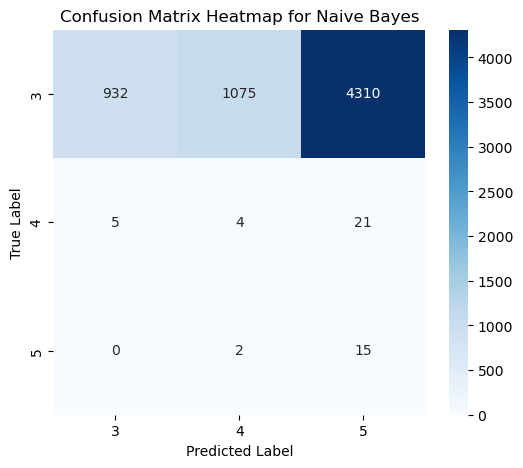

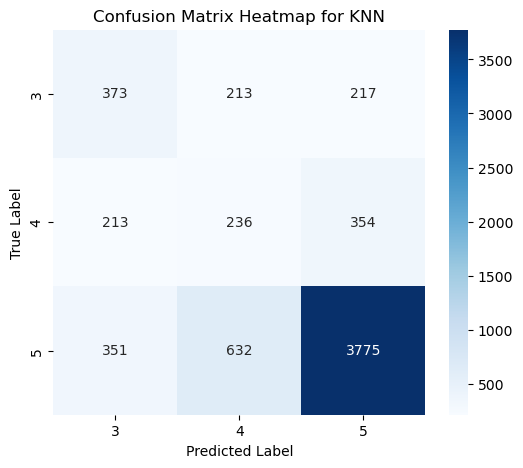

In [195]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


models = {"Linear SVC": LinearSVC(), "Random Forest": RandomForestClassifier(), "Naive Bayes": GaussianNB(), "KNN": KNeighborsClassifier()}
model_scores = {}

for name, model in  models.items():
    model.fit(X_train, depression_y_train)
    b = model.score(X_test, depression_y_test)
    model_scores[name] = b
    a = model.predict(X_test)
    conf = confusion_matrix(a, depression_y_test)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix Heatmap for {name}")
    plt.show()

In [196]:
model_scores

{'Linear SVC': 0.8719358893777498,
 'Random Forest': 0.9109050911376493,
 'Naive Bayes': 0.1494343180389692,
 'KNN': 0.688874921433061}